### What is XGBoost?

Imagine you have a bunch of toys (your data), and you're trying to figure out how to stack them so they don’t fall over (making predictions). You try different ways of stacking, but some methods might not work very well.

Now, think of **XGBoost** as a smart helper who:

- Tries stacking the toys in many different ways (using different models) to see which works best.
- Fixes mistakes from previous attempts by trying harder on the toys that fell over.
- Keeps improving each time until the stack is perfect (the prediction is as close to the real answer as possible).

So, **XGBoost** is like a super-smart helper who builds many little models, learns from mistakes, and makes better predictions each time!


In [30]:
# Supervised Learning divided into classificaion and regression

# Importing data and dependencies 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### importing the dataset

In [32]:
df=pd.read_csv("housing.csv")

# Data Eyeballing

In [33]:
df.shape

(20640, 10)

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
number_df=df.select_dtypes(include='number')
number_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# Data Cleaning

In [40]:
df.dropna(inplace=True) #drops rows with null values
df.shape

(20433, 10)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# EDA

<Axes: >

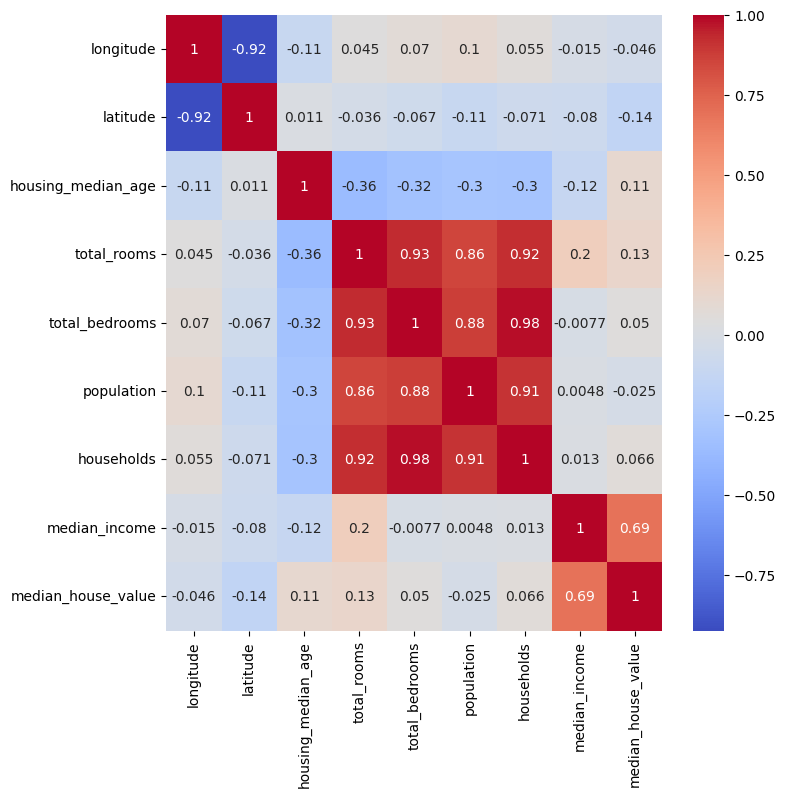

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(number_df.corr(), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

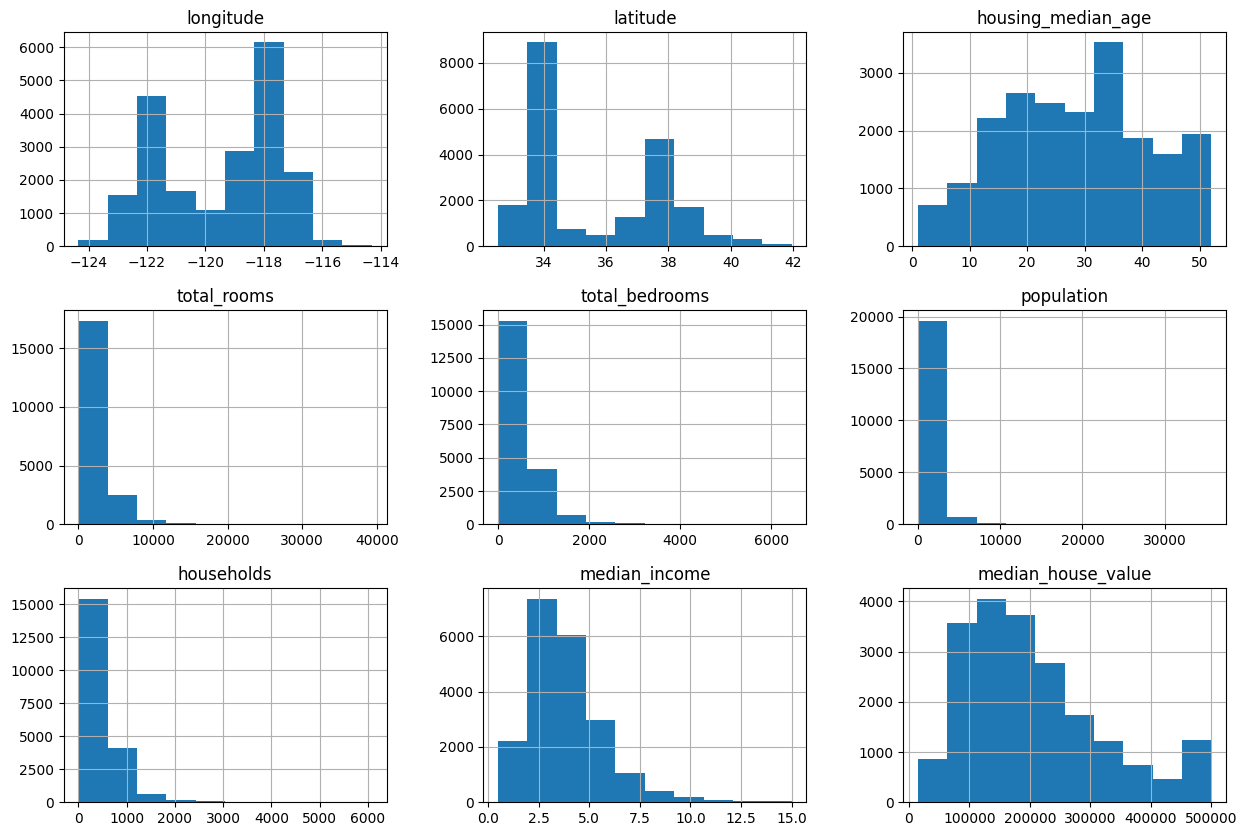

In [43]:
df.hist(figsize=(15,10))

# Splitting Predictors and Target

In [44]:
X = df.drop(columns=['median_house_value','ocean_proximity'],axis=1)
y=df['median_house_value']

In [45]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [46]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Train_Test_Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [48]:
train_data=X_train.join(y_train) #shows the final training data with X_train and y_train
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0
...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0


# EDA for training data (Data Exploration)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

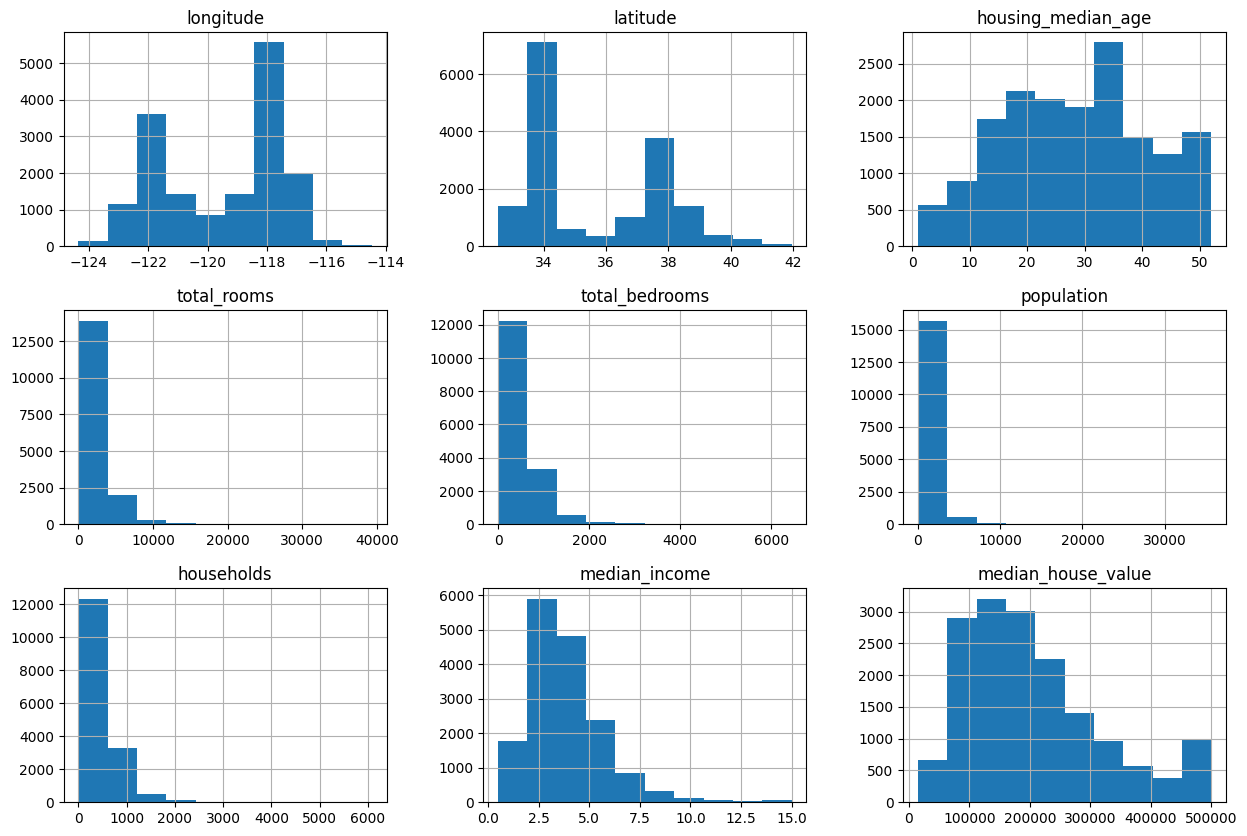

In [49]:
train_data.hist(figsize=(15,10))

<Figure size 2000x1500 with 0 Axes>

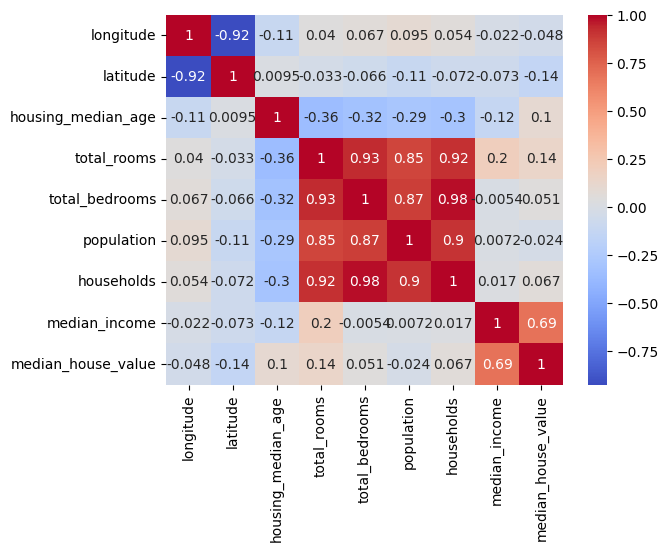

<Figure size 2000x1500 with 0 Axes>

In [50]:
numberic_df=train_data.select_dtypes(include='number')
sns.heatmap(numberic_df.corr(),annot=True,cmap="coolwarm")
plt.figure(figsize=(20,15))

<Axes: xlabel='latitude', ylabel='longitude'>

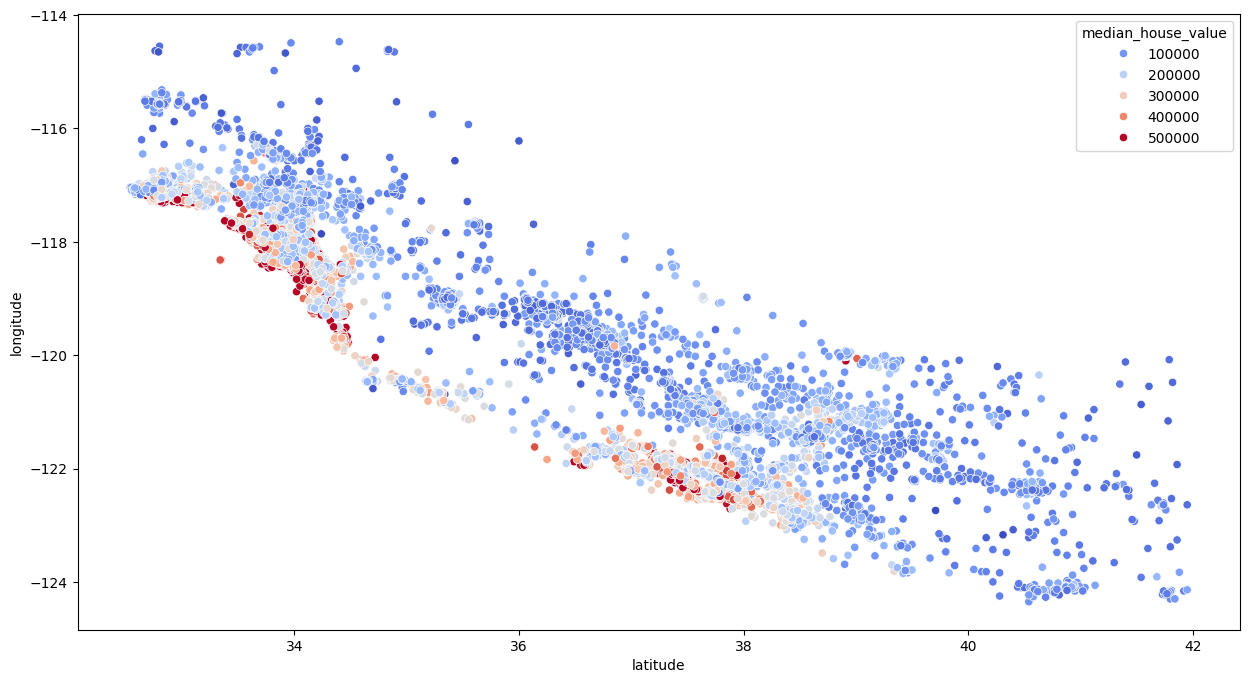

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette="coolwarm")

# Training & Predicting the Linear Regression Model


In [52]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred_linear=model.predict(X_test)

In [54]:
y_pred_linear

array([197058.03752155, 157508.79088917, 202099.26270386, ...,
       131098.67538846, 155468.78077783, 166363.59962367])

In [55]:
y_test

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
8291     500001.0
6274     157900.0
2997     100200.0
13440    127700.0
14797    133700.0
Name: median_house_value, Length: 4087, dtype: float64

# y_test VS y_pred Graphically for Linear Regression

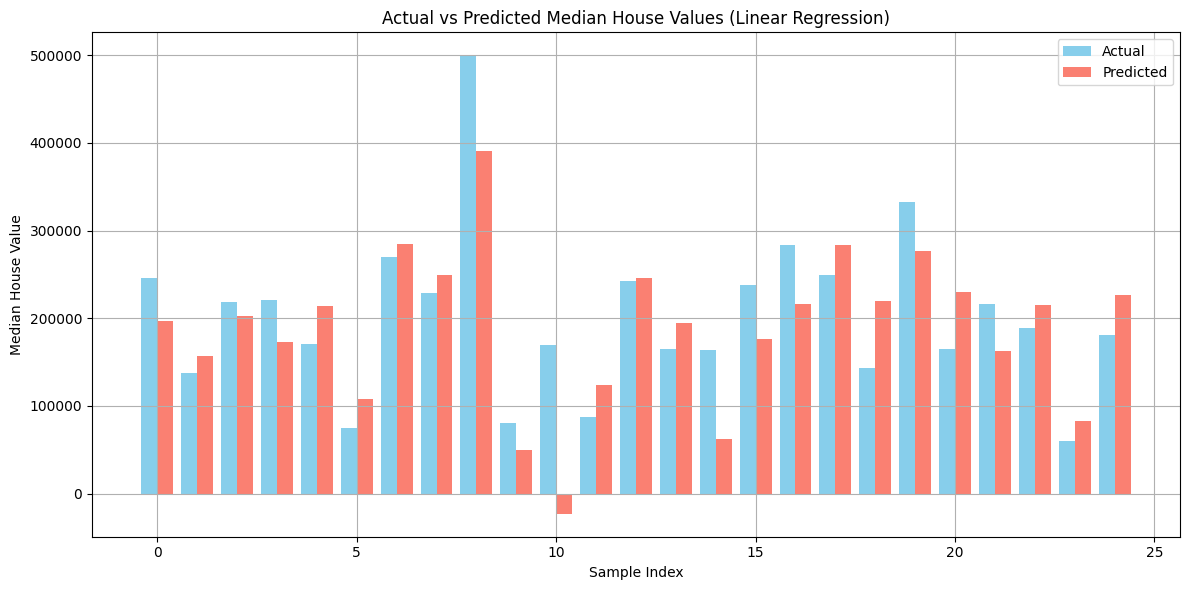

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
# Select a subset (e.g., first 25 predictions) for better readability
num_samples = 25
indices = np.arange(num_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test[:num_samples], 0.4, label='Actual', color='skyblue')
plt.bar(indices + 0.2, y_pred_linear[:num_samples], 0.4, label='Predicted', color='salmon')

plt.title('Actual vs Predicted Median House Values (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


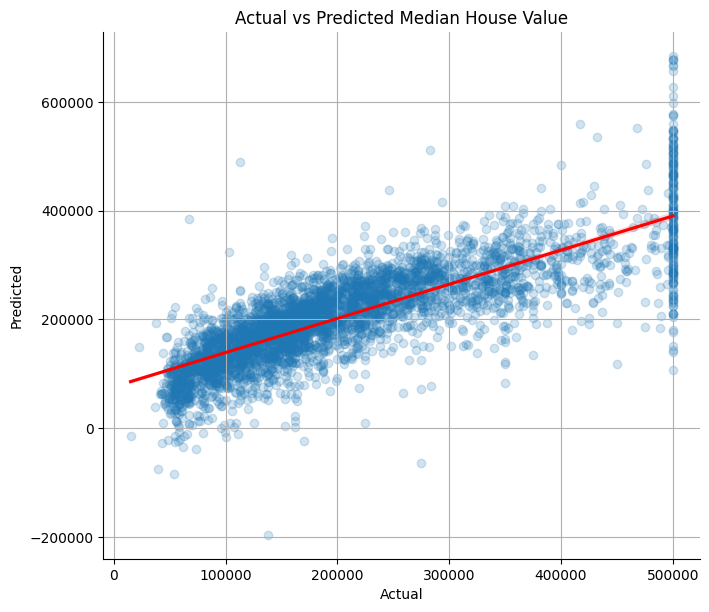

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_linear
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.show()


# Evaluation Metrics for linear regression



In [58]:
# Compute metrics
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Print the regression report
print("Regression Report for Linear Regression:")
print(f"R² Score:              {r2_linear:.4f}")
print(f"Mean Absolute Error:   {mae_linear:.4f}")
print(f"Mean Squared Error:    {mse_linear:.4f}")
print(f"Root Mean Squared Error: {rmse_linear:.4f}")

Regression Report for Linear Regression:
R² Score:              0.6401
Mean Absolute Error:   51372.6722
Mean Squared Error:    4921881237.6282
Root Mean Squared Error: 70156.1205


# Model Training & Predicting with XGBoost Regressor

In [59]:

m=XGBRegressor()
m.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [60]:
y_pred_xgb=m.predict(X_test)

# y_test VS y_pred Graphically for XGBoost Regressor

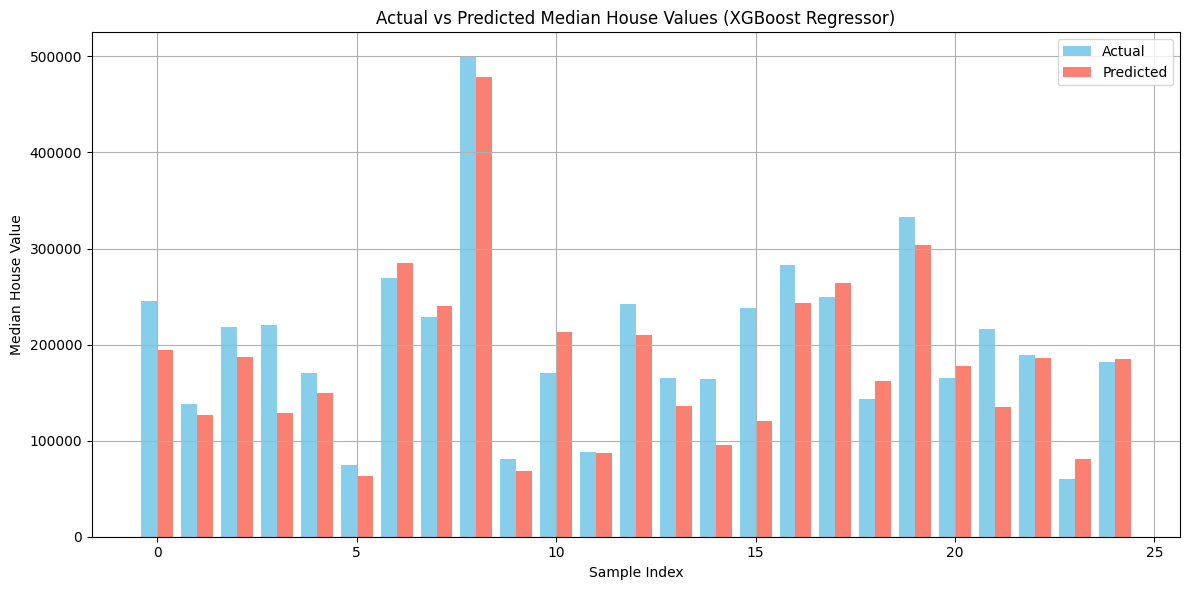

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_test and y_pred are your actual and predicted values
# Select a subset (e.g., first 25 predictions) for better readability
num_samples = 25
indices = np.arange(num_samples)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(indices - 0.2, y_test[:num_samples], 0.4, label='Actual', color='skyblue')
plt.bar(indices + 0.2, y_pred_xgb[:num_samples], 0.4, label='Predicted', color='salmon')

plt.title('Actual vs Predicted Median House Values (XGBoost Regressor)')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


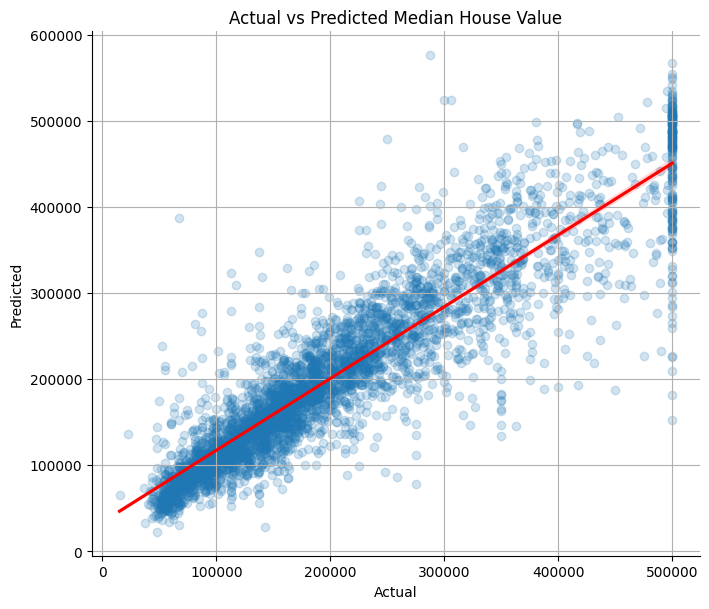

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.show()


# Evaluation Metrics for XGboost



In [63]:
# Compute metrics
r2_xgboost = r2_score(y_test, y_pred_xgb)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgb)
mse_xgboost = mean_squared_error(y_test, y_pred_xgb)
rmse_xgboost = np.sqrt(mse_xgboost)

# Print the regression report
print("Regression Report for XGBoost Regression:")
print(f"R² Score:              {r2_xgboost:.4f}")
print(f"Mean Absolute Error:   {mae_xgboost:.4f}")
print(f"Mean Squared Error:    {mse_xgboost:.4f}")
print(f"Root Mean Squared Error: {rmse_xgboost:.4f}")

Regression Report for XGBoost Regression:
R² Score:              0.8242
Mean Absolute Error:   32445.7790
Mean Squared Error:    2403489962.6951
Root Mean Squared Error: 49025.4012


# Comparison Between XGBoost and Linear Regression using Pandas

In [64]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'XGBoost': [r2_xgboost, mae_xgboost, mse_xgboost, rmse_xgboost],
    'Linear Regression': [r2_linear, mae_linear, mse_linear, rmse_linear]
})

print("\nRegression Model Comparison:")
print(comparison_df.to_string(index=False, float_format="%.4f"))



Regression Model Comparison:
  Metric         XGBoost  Linear Regression
R² Score          0.8242             0.6401
     MAE      32445.7790         51372.6722
     MSE 2403489962.6951    4921881237.6282
    RMSE      49025.4012         70156.1205


# Evaluation of XGBoost and Linear Regression using scatter plot

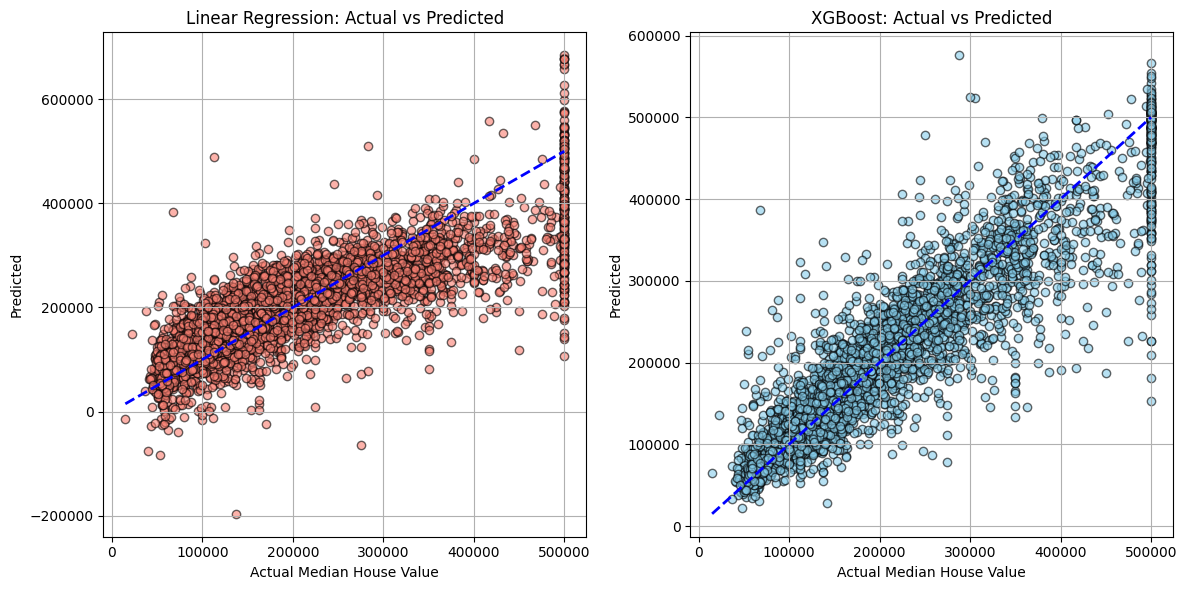

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='salmon', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)

# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='skyblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()


# Final Outcome

### Summary of Key Insights:
- **XGBoost** has a higher **R² score** than **Linear Regression**, meaning it explains the variance in house prices more effectively.
- **XGBoost** has lower **MAE** and **MSE**, indicating it makes more accurate and stable predictions.
- Both models have the same **RMSE**, but **XGBoost's** lower **MAE** and **MSE** show it performs better overall.

### Conclusion:
- **XGBoost** outperforms **Linear Regression** in this case.
- **XGBoost** is better at handling complex, non-linear relationships in the data.
- **Linear Regression** is simpler but less effective for this particular dataset.
